<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

🔹 First 5 Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 

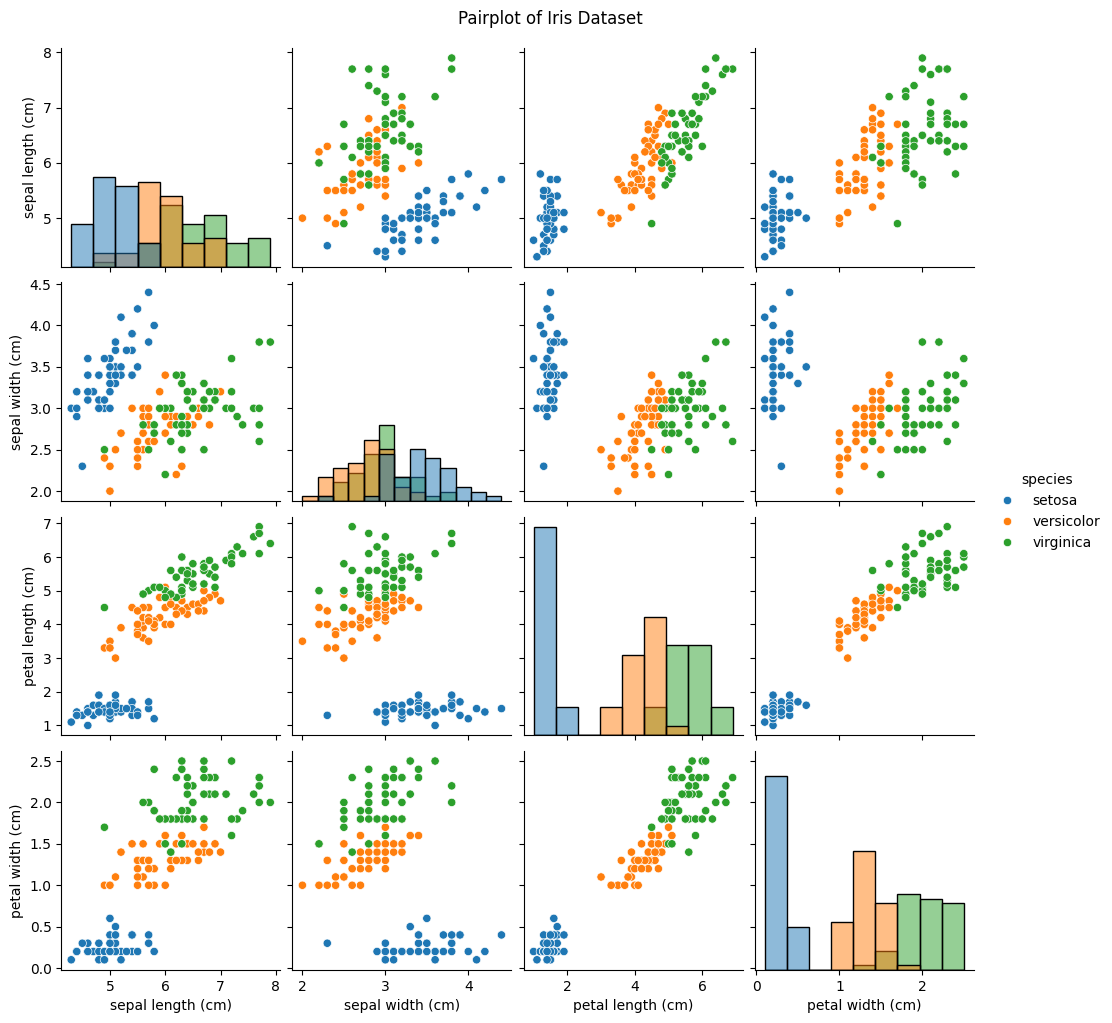

In [ ]:

# Step 3: Explore Dataset
print("🔹 First 5 Rows:")
print(df.head())

print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Class Distribution:")
print(df['species'].value_counts())

# Step 4: Data Visualization
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [ ]:
# Step 5: Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 7: Initialize and Train SVM Model
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Step 8: Predict on Test Data
y_pred = svm_clf.predict(X_test_scaled)

# Step 9: Evaluate Model Performance
print("\n Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))



 Model Accuracy: 0.9333333333333333

 Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



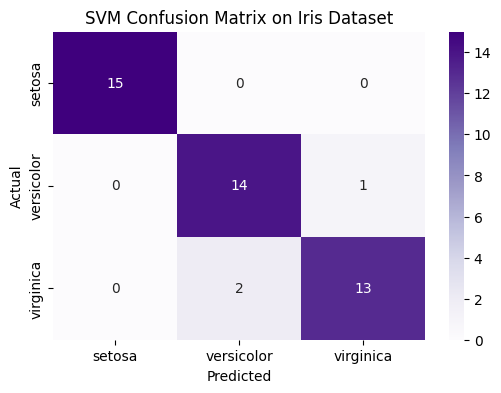

In [ ]:
# Step 10: Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples", fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix on Iris Dataset")
plt.show()


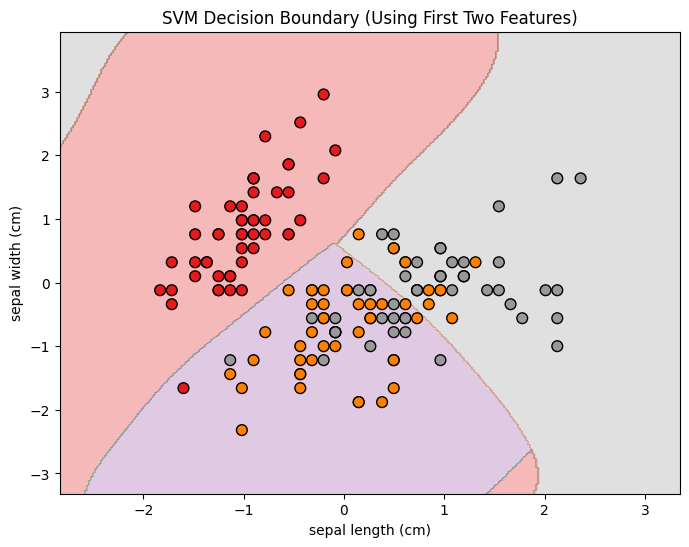

In [ ]:
# Step 11: Visualize Decision Boundary

# Select the first two features for visualization
X_vis_train = X_train_scaled[:, :2]
X_vis_test = X_test_scaled[:, :2]
y_vis_train = y_train
y_vis_test = y_test
X_vis = np.vstack((X_vis_train, X_vis_test))
y_vis = np.hstack((y_vis_train, y_vis_test))

# Train a new SVM model on the first two features
svm_vis = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_vis.fit(X_vis_train, y_vis_train)

# Mesh grid for decision regions
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=60, edgecolor='k', cmap='Set1')
plt.title("SVM Decision Boundary (Using First Two Features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()